In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('~/Downloads/FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df['MODELYEAR'].head(20)

0     2014
1     2014
2     2014
3     2014
4     2014
5     2014
6     2014
7     2014
8     2014
9     2014
10    2014
11    2014
12    2014
13    2014
14    2014
15    2014
16    2014
17    2014
18    2014
19    2014
Name: MODELYEAR, dtype: int64

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


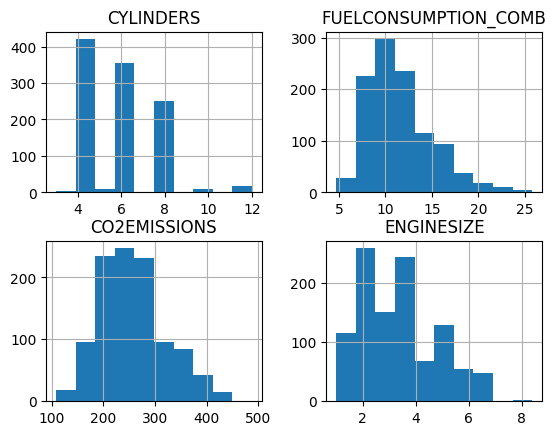

In [8]:
cdf=df[['CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','ENGINESIZE']]
cdf.hist()
plt.show()

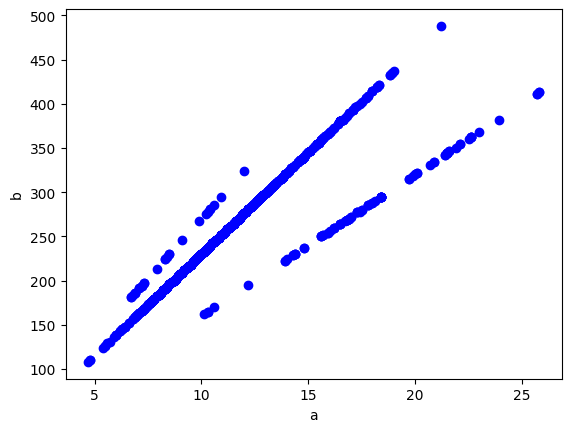

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

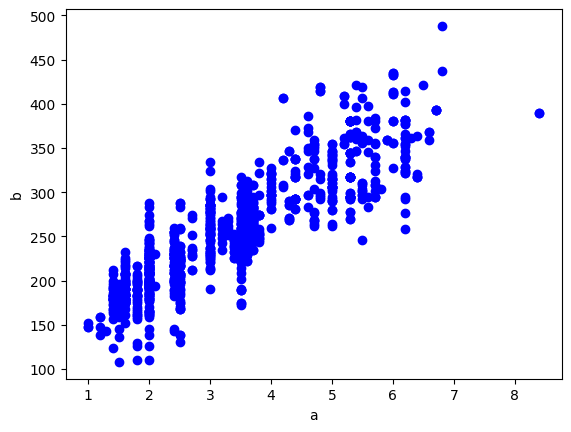

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

In [23]:
mask=np.random.rand(len(df))<0.8
train=cdf[mask]
test=cdf[~mask]
print(mask)
print(train)
print(test)

1
[ True  True  True ...  True False False]
      CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS  ENGINESIZE
0             4                   8.5           196         2.0
1             4                   9.6           221         2.4
2             4                   5.9           136         1.5
3             6                  11.1           255         3.5
5             6                  10.0           230         3.5
...         ...                   ...           ...         ...
1060          6                  11.5           264         3.0
1061          6                  11.2           258         3.2
1062          6                  11.8           271         3.0
1063          6                  11.5           264         3.2
1064          6                  11.8           271         3.0

[859 rows x 4 columns]
      CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS  ENGINESIZE
4             6                  10.6           244         3.5
17            8                  15.

In [25]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print('coeff',reg.coef_)
print('inter',reg.intercept_)

coeff [[38.64472125]]
inter [127.44644828]


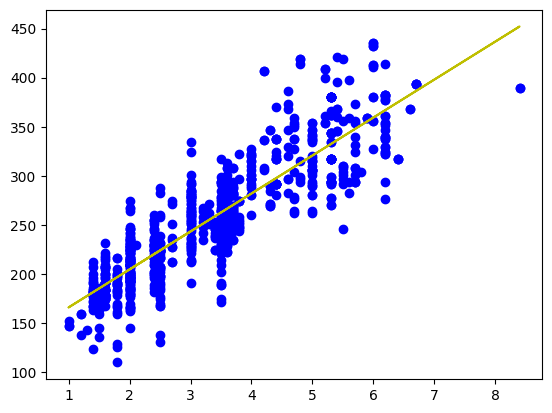

In [27]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'y')

In [36]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
predicted=reg.predict(test_x)

print("MSE %.2f" %np.mean(np.absolute(predicted-test_y)))
print("RMSE %.2f" % np.mean((predicted-test_y)**2))
print("R2 %.2f" % r2_score(predicted,test_y))

MSE 25.63
RMSE 1153.75
R2 0.62
